<a href="https://colab.research.google.com/github/andarahabibie/DataScienceToolsEcosystem/blob/main/Final_Assignment_Analyzing_Historical_Stock_Revenue_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Extracting Tesla Stock Data Using yfinance</li>
        <li>Question 2: Extracting Tesla Revenue Data Using Webscraping</li>
        <li>Question 3: Extracting GameStop Stock Data Using yfinance</li>
        <li>Question 4: Extracting GameStop Revenue Data Using Webscraping</li>
        <li>Question 5: Tesla Stock and Revenue Dashboard</li>
        <li>Question 6: GameStop Stock and Revenue Dashboard</li>
        <li>Question 7: Sharing your Assignment Notebook</li>
    </ul>
<p>
    Estimated Time Needed: <strong>60 min</strong></p>
</div>

<hr>


In [7]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In [9]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## **Question 1: Extracting Tesla Stock Data Using yfinance**

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [10]:
tesla = yf.Ticker("TSLA")

In [11]:
tesla_data = tesla.history(period="max")

In [12]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [30]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3704,2025-03-20 00:00:00-04:00,233.350006,238.000000,230.050003,236.259995,99028300,0.0,0.0
3705,2025-03-21 00:00:00-04:00,234.990005,249.520004,234.550003,248.710007,132728700,0.0,0.0
3706,2025-03-24 00:00:00-04:00,258.079987,278.640015,256.329987,278.390015,169079900,0.0,0.0
3707,2025-03-25 00:00:00-04:00,283.600006,288.200012,271.279999,288.140015,150361500,0.0,0.0


## **Question 2: Extracting Tesla Revenue Data Using Webscraping**





Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup`.


Using beautiful soup extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [13]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# ... (rest of the code)

# In Question 2 and Question 4, change the way we download the webpage
# and add headers to mimic a browser request:

# Define the function to fetch the webpage with headers
def get_html_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.text

# Now to fetch the webpage for Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = get_html_data(url) # Use the function above to fetch

# And store the appropriate table within the HTML
tesla_revenue = pd.read_html(html_data, match="Tesla Quarterly Revenue", flavor='bs4')[0]

# Rename the columns
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace=False)


# Now, the .head() or plotting code should work (assuming the dataframe is in the expected format)
tesla_revenue.head()

<ipython-input-13-88d9fbba667a>:34: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(html_data, match="Tesla Quarterly Revenue", flavor='bs4')[0]


,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2024-12-31,"$25,707"
1,2024-09-30,"$25,182"
2,2024-06-30,"$25,500"
3,2024-03-31,"$21,301"
4,2023-12-31,"$25,167"


<details><summary>Click here if you need help removing the dollar sign and comma</summary>

```
    
If you parsed the HTML table by row and column you can use the replace function on the string
    
    revenue = col[1].text.replace("$", "").replace(",", "")
    
If you use the read_html function you can use the replace function on the string representation of the column

    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

```

</details>


Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire `tesla_revenue` DataFrame to see if you have any.


In [14]:
tesla_revenue

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2024-12-31,"$25,707"
1,2024-09-30,"$25,182"
2,2024-06-30,"$25,500"
3,2024-03-31,"$21,301"
4,2023-12-31,"$25,167"
...,...,...
58,2010-06-30,$28
59,2010-03-31,$21
60,2009-12-31,NaN
61,2009-09-30,$46


<details><summary>Click here if you need help removing the Nan or empty strings</summary>

```
    
If you have NaN in the Revenue column
    
    tesla_revenue.dropna(inplace=True)
    
If you have emtpty string in the Revenue column

    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

```

</details>


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [15]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
57,2010-09-30,$31
58,2010-06-30,$28
59,2010-03-31,$21
61,2009-09-30,$46
62,2009-06-30,$27


## **Question 3: Extracting GameStop Stock Data Using yfinance**


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [16]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [17]:
gme_data=gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [18]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## **Question 4: Extracting GameStop Revenue Data Using Webscraping**


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Save the text of the response as a variable named `html_data`.


In [19]:
!pip install requests html5lib
from bs4 import BeautifulSoup
import pandas as pd
import requests

def get_html_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.text

In [20]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = get_html_data(url)

Parse the html data using `beautiful_soup`.


In [21]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [22]:
gme_revenue = pd.read_html(html_data, match="GameStop Quarterly Revenue", flavor='bs4')[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date','GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'},inplace=False)

gme_revenue.head()

<ipython-input-22-2c5157db03c5>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(html_data, match="GameStop Quarterly Revenue", flavor='bs4')[0]


,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2024-10-31,$860
1,2024-07-31,$798
2,2024-04-30,$882
3,2024-01-31,"$1,794"
4,2023-10-31,"$1,078"


In [23]:
gme_revenue

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2024-10-31,$860
1,2024-07-31,$798
2,2024-04-30,$882
3,2024-01-31,"$1,794"
4,2023-10-31,"$1,078"
...,...,...
59,2010-01-31,"$3,524"
60,2009-10-31,"$1,835"
61,2009-07-31,"$1,739"
62,2009-04-30,"$1,981"


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [24]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
59,2010-01-31,"$3,524"
60,2009-10-31,"$1,835"
61,2009-07-31,"$1,739"
62,2009-04-30,"$1,981"
63,2009-01-31,"$3,492"


## **Question 5: Tesla Stock and Revenue Dashboard**


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`


In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")
    return hist[['Close']]

def get_revenue_data(ticker):
    url = f"https://www.macrotrends.net/stocks/charts/{ticker}/company/revenue"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to retrieve data for {ticker}")
        return pd.DataFrame()

    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all("table")

    revenue_data = []
    for table in tables:
        rows = table.find_all("tr")
        for row in rows[1:]:  # Skip header row
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                try:
                    revenue_data.append([pd.to_datetime(date), float(revenue)])
                except ValueError:
                    continue

    df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])
    df = df.sort_values('Date')
    return df

In [26]:
tesla_stock = get_stock_data("TSLA")
tesla_revenue = get_revenue_data("TSLA")

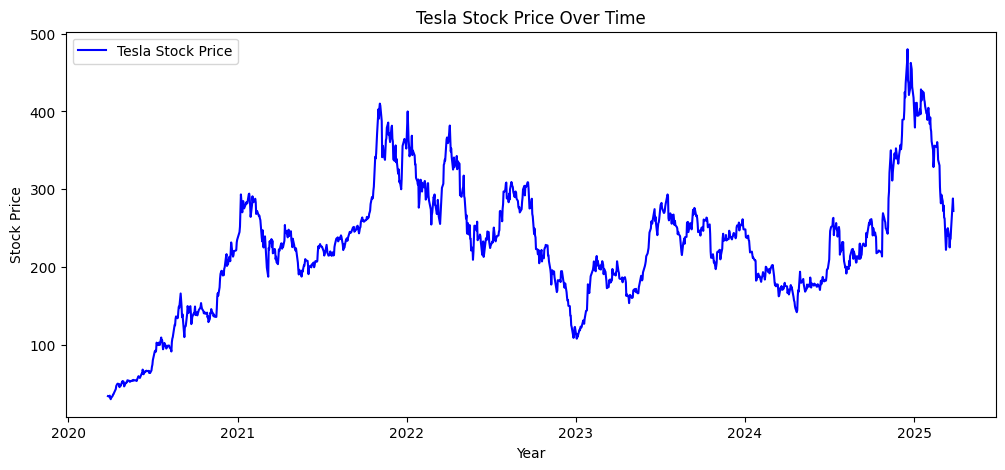

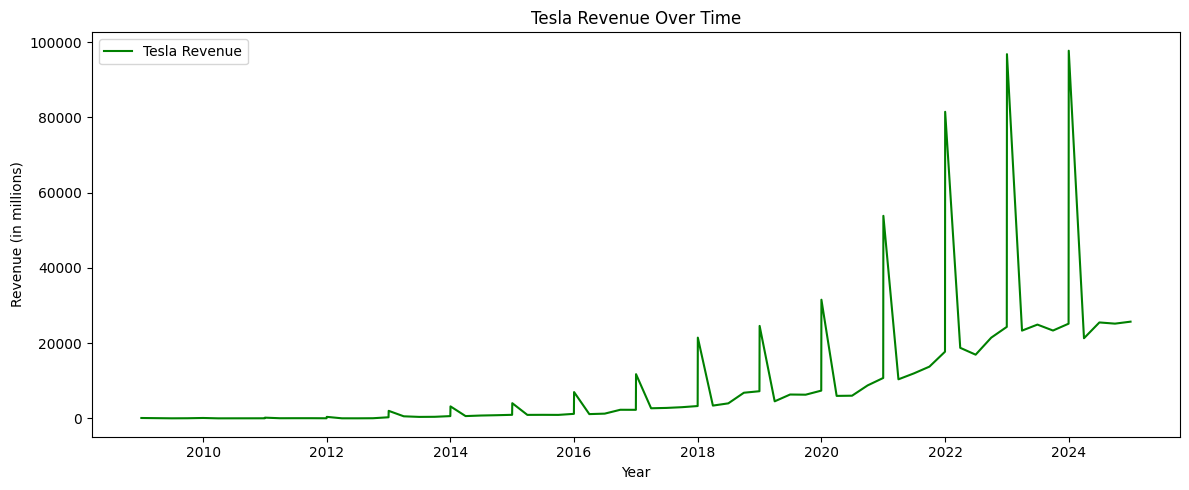

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(tesla_stock.index, tesla_stock['Close'], label='Tesla Stock Price', color='blue')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.legend()
plt.show()

if not tesla_revenue.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue', color='green')
    plt.xlabel('Year')
    plt.ylabel('Revenue (in millions)')
    plt.title('Tesla Revenue Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()

## **Question 6: GameStop Stock and Revenue Dashboard**


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`.


In [28]:
gamestop_stock = get_stock_data("GME")
gamestop_revenue = get_revenue_data("GME")

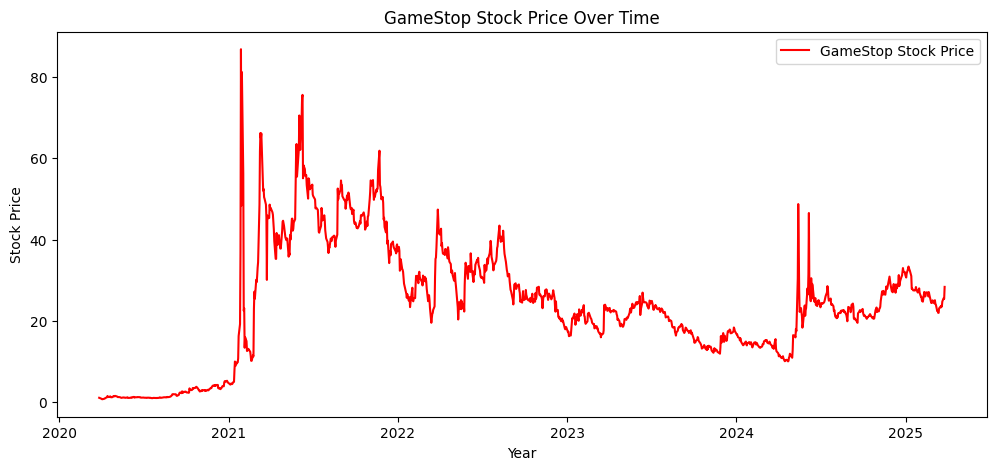

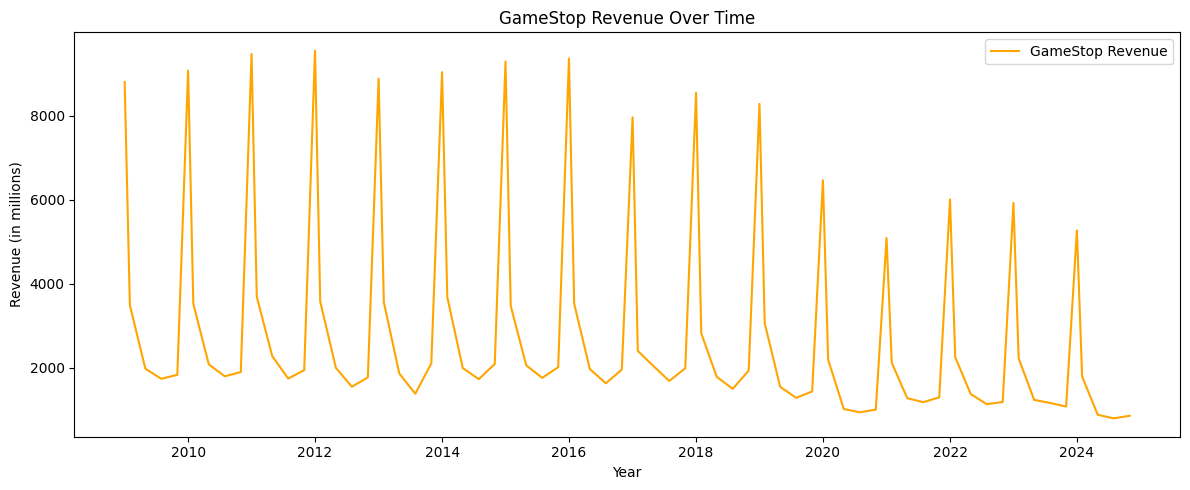

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(gamestop_stock.index, gamestop_stock['Close'], label='GameStop Stock Price', color='red')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('GameStop Stock Price Over Time')
plt.legend()
plt.show()

if not gamestop_revenue.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], label='GameStop Revenue', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Revenue (in millions)')
    plt.title('GameStop Revenue Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()